Question 1

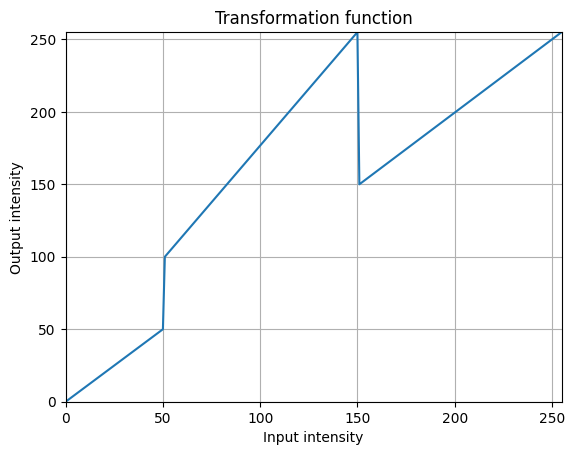

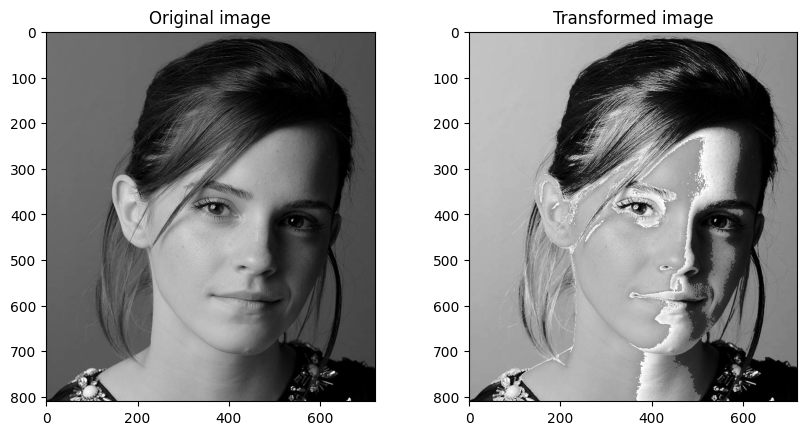

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read image
Original_image_Emma = cv.imread('../emma.jpg', cv.IMREAD_GRAYSCALE)

t1 = np.linspace(0 , 50 , 51)
t2 = np.linspace(100 , 255 , 150-50)
t3 = np.linspace(150 , 255 , 255-150)
transform1 = np.concatenate((t1,t2,t3), axis=0)

fig1 , ax = plt.subplots()
ax.set_title('Transformation function')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim([0,255])
ax.set_ylim([0,255])
ax.plot(transform1)
ax.grid(True)
plt.show()

Transformed_image_Emma = cv.LUT(Original_image_Emma, transform1)

fig2 , (ax1, ax2) = plt.subplots(1,2)
fig2.set_figwidth(10)
ax1.set_title('Original image')
ax1.imshow(Original_image_Emma, cmap='gray')
ax2.set_title('Transformed image')
ax2.imshow(Transformed_image_Emma, cmap='gray')
plt.show()

Question 2

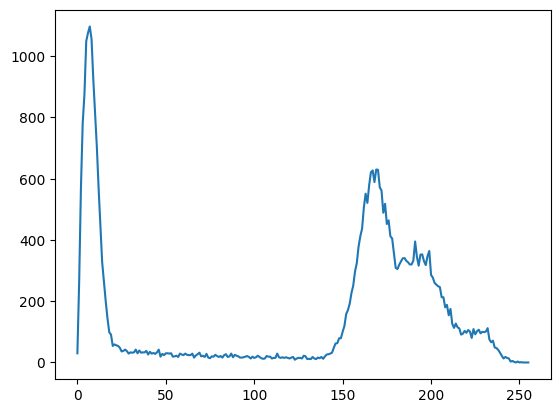

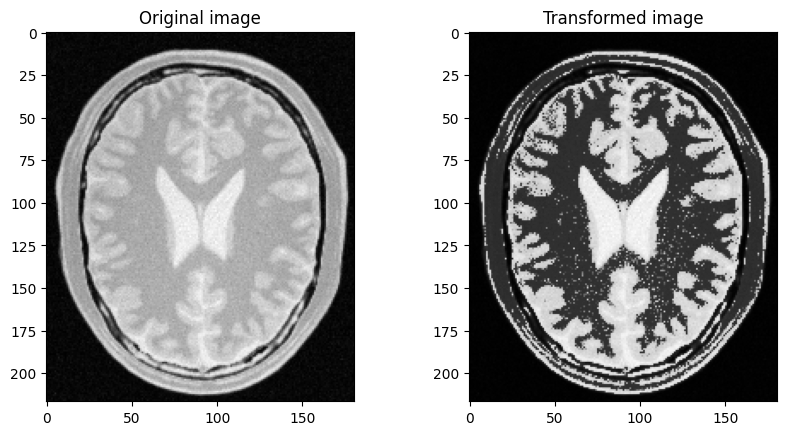

In [3]:
original_image_brain = cv.imread('../BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)  

hist = cv.calcHist([original_image_brain], [0], None, [256], [0, 256])
plt.plot(hist)

t1 = np.linspace(0 , 50 , 201-20-5)
t2 = np.linspace(51 , 200 , 10)
t3 = np.linspace(201 , 255 , 255-200+15)
transform2 = np.concatenate((t1,t2,t3), axis=0)


Transformed_image_brain = cv.LUT(original_image_brain, transform2)

fig2 , (ax1, ax2) = plt.subplots(1,2)
fig2.set_figwidth(10)
ax1.set_title('Original image')
ax1.imshow(original_image_brain, cmap='gray')
ax2.set_title('Transformed image')
ax2.imshow(Transformed_image_brain, cmap='gray')
plt.show()

 

Question 3

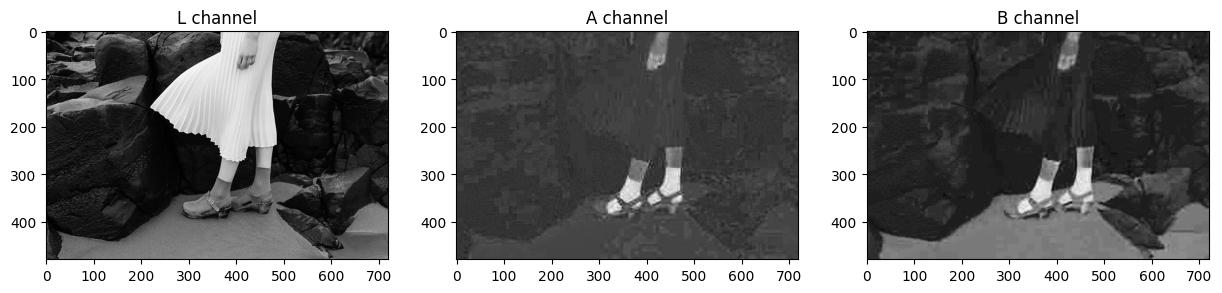

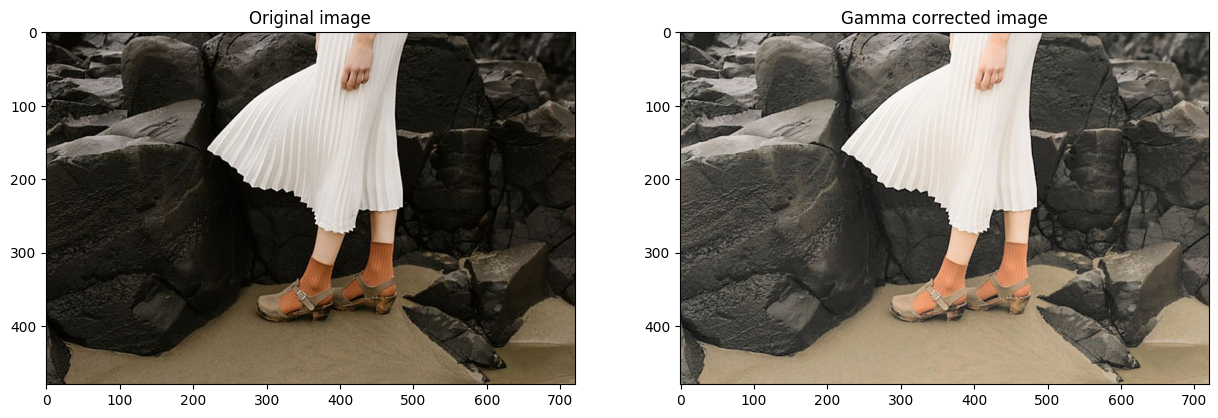

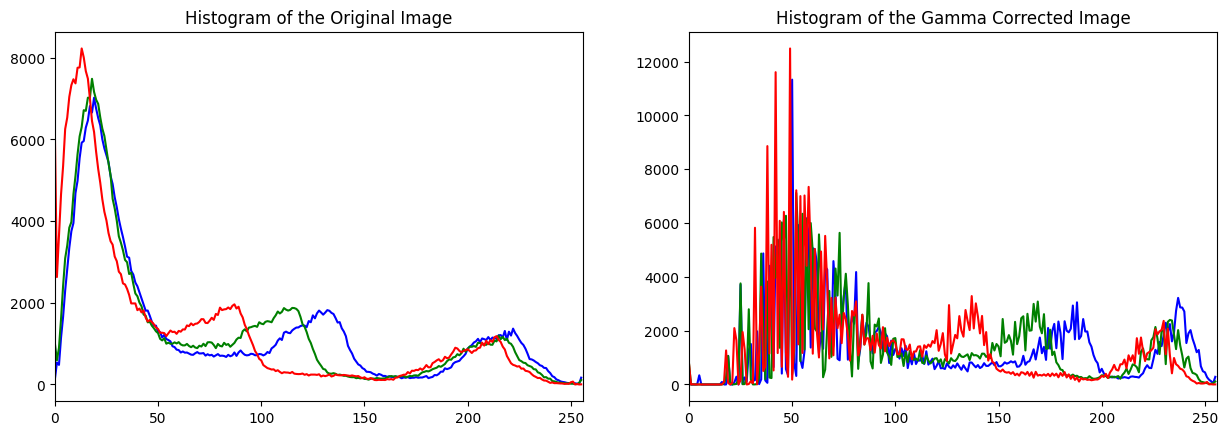

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


original_image_for_gamma_correction = cv.imread('../highlights_and_shadows.jpg', cv.IMREAD_COLOR)
LAB_image_for_gamma_correction = cv.cvtColor(original_image_for_gamma_correction, cv.COLOR_BGR2LAB)
L_channel, A_channel, B_channel = cv.split(LAB_image_for_gamma_correction)

fig1 , (ax1, ax2, ax3) = plt.subplots(1,3)
fig1.set_figwidth(15)
ax1.set_title('L channel')
ax1.imshow(L_channel, cmap='gray')
ax2.set_title('A channel')
ax2.imshow(A_channel, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(B_channel, cmap='gray')

gamma = 0.5
gamma_correction = np.array([((i/255)**gamma)*255 for i in np.arange(0,256)]).astype('uint8')

L_channel  = cv.LUT(L_channel,gamma_correction)
gamma_corrected_image = cv.merge((L_channel,A_channel,B_channel))


original_image_for_gamma_correction = cv.cvtColor(original_image_for_gamma_correction, cv.COLOR_BGR2RGB)
gamma_corrected_image = cv.cvtColor(gamma_corrected_image, cv.COLOR_LAB2RGB)

fig2 , (ax1,ax2) = plt.subplots(1,2)
fig2.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(original_image_for_gamma_correction, cmap='gray')
ax2.set_title('Gamma corrected image')
ax2.imshow(gamma_corrected_image, cmap='gray')

#Histogram of the Original Image and Gamma Corrected Image
fig3 , (ax1,ax2) = plt.subplots(1,2)
fig3.set_figwidth(15)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([original_image_for_gamma_correction],[i],None,[256],[0,256])
    ax1.plot(histr,color = col)
    ax1.set_xlim([0,256])
    
for i,col in enumerate(color):
    histr = cv.calcHist([gamma_corrected_image],[i],None,[256],[0,256])
    ax2.plot(histr,color = col)
    ax2.set_xlim([0,256])
    
ax1.set_title('Histogram of the Original Image')
ax2.set_title('Histogram of the Gamma Corrected Image')



plt.show()

Question 4

[[ 64  59  62 ...  67  76  85]
 [ 71  71  71 ...  67  60  69]
 [ 71  71  71 ...  83  74  62]
 ...
 [ 45  41  64 ... 103 103 110]
 [ 72  74  55 ... 108 110 108]
 [ 83  50  87 ... 112 112 112]]


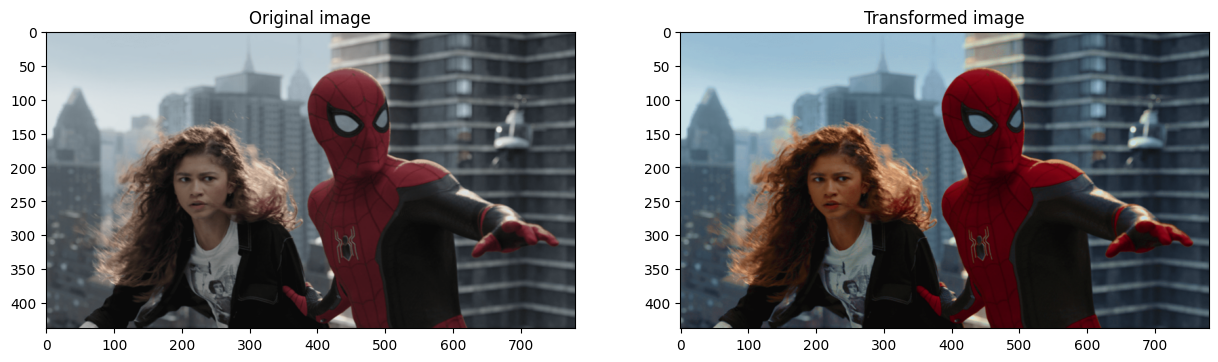

In [5]:
Original_image_spider = cv.imread('../spider.png', cv.IMREAD_COLOR)
Original_image_spider = cv.cvtColor(Original_image_spider, cv.COLOR_BGR2RGB)
converted_image_spider = cv.cvtColor(Original_image_spider, cv.COLOR_RGB2HSV)
hue, saturation, value = cv.split(converted_image_spider)
def f_x(x , a ):
    z=70
    y = int(x + (128*a)*(np.exp(-(((x-128)**2)/(2*(z**2))))))
    return (min(y,255))
a=0.75

transformed_saturation = np.vectorize(f_x)(saturation, a).astype(np.uint8)

print(transformed_saturation)
# Recombine the planes
vibrant_hsv_image = cv.merge([hue, transformed_saturation, value])

# Convert back to BGR color space
vibrant_bgr_image = cv.cvtColor(vibrant_hsv_image, cv.COLOR_HSV2RGB)

fig2 , (ax1, ax2) = plt.subplots(1,2)
fig2.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(Original_image_spider)
ax2.set_title('Transformed image')
ax2.imshow(vibrant_bgr_image)
plt.show()


Question 5

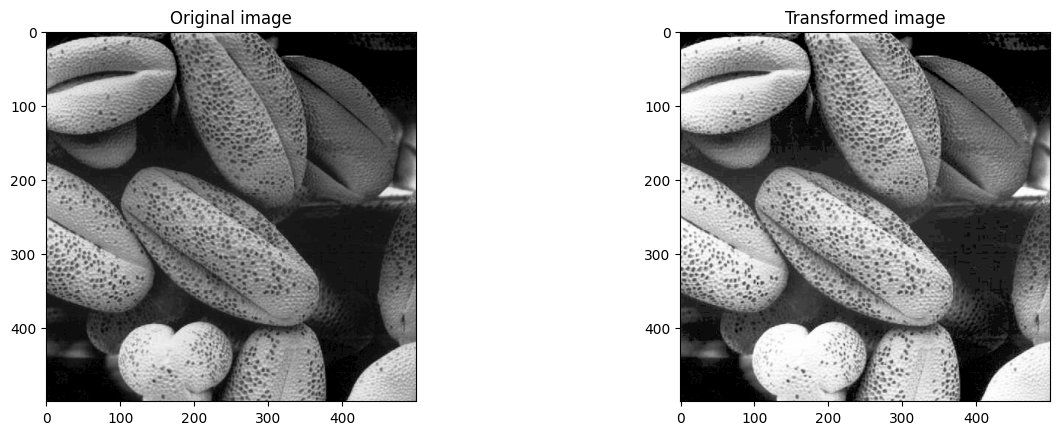

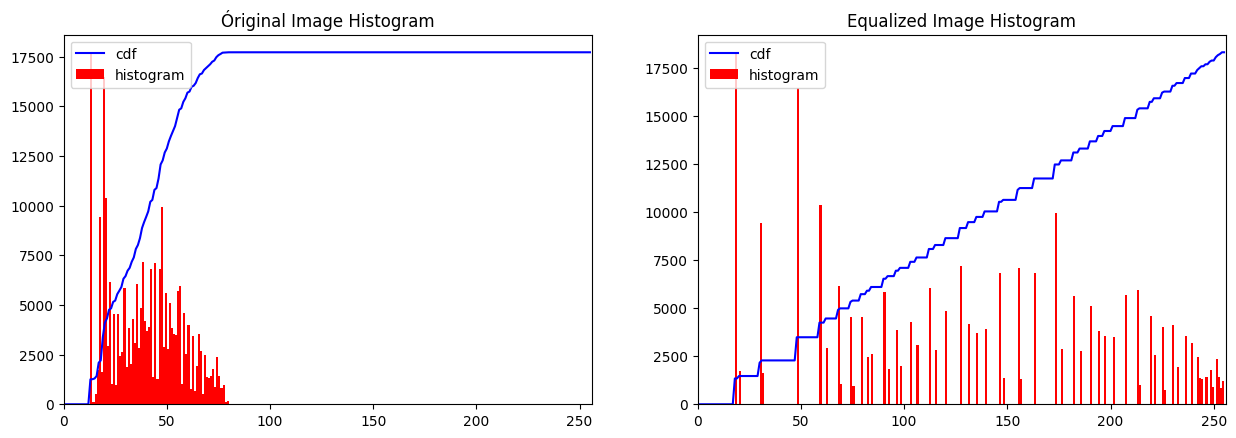

In [6]:
def Histogram_Equalizer(image):
    hist , bins = np.histogram(image.ravel(),256,[0,256])
    M,N = image.shape
    Transformation = (255*((hist.cumsum())/(M*N))).astype(np.uint8)
    return cv.LUT(image, Transformation)
    
Original_image_Figure5 = cv.imread('../shells.tif', cv.IMREAD_GRAYSCALE)    


Equalized_Image = Histogram_Equalizer(Original_image_Figure5)
fig1 , (ax1, ax2) = plt.subplots(1,2)
fig1.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(Original_image_Figure5, cmap='gray')
ax2.set_title('Transformed image')
ax2.imshow(Equalized_Image, cmap='gray')
plt.show()


hist_Original, bins_original = np.histogram(Original_image_Figure5.ravel(), 256, [0, 256])
cdf_Original = hist_Original.cumsum()
cdf_normalized_original = cdf_Original * hist_Original.max()/ cdf_Original.max()

hist_Equalized , bins_Equalized = np.histogram(Equalized_Image.ravel(), 256, [0, 256])
cdf_Equalized = hist_Equalized.cumsum()
cdf_normalized_Equalized = cdf_Equalized * hist_Equalized.max()/ cdf_Equalized.max()

fig2 , (ax1, ax2) = plt.subplots(1,2)
fig2.set_figwidth(15)
ax1.set_title('Óriginal Image Histogram')
ax1.plot(cdf_normalized_original, color = 'b')
ax1.hist(Original_image_Figure5.flatten(), 256, [0, 256], color = 'r')
ax1.set_xlim([0,256])
ax1.legend(('cdf','histogram'), loc = 'upper left')

ax2.set_title('Equalized Image Histogram')
ax2.plot(cdf_normalized_Equalized, color = 'b')
ax2.hist(Equalized_Image.flatten(), 256, [0, 256], color = 'r')
ax2.set_xlim([0,256])
ax2.legend(('cdf','histogram'), loc = 'upper left')
plt.show()




Qiestion 6

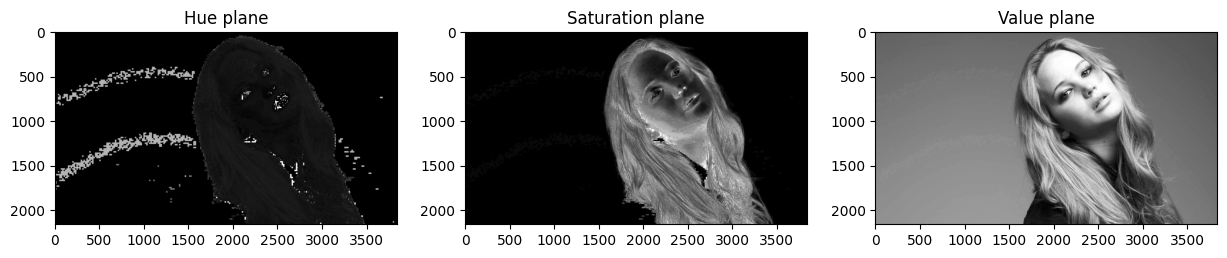

In [7]:
Original_image_jeniffer = cv.imread('../jeniffer.jpg')
Original_image_jeniffer_converted = cv.cvtColor(Original_image_jeniffer , cv.COLOR_BGR2HSV)
hue,saturation,value = cv.split(Original_image_jeniffer_converted)
fig1 , (ax1, ax2, ax3) = plt.subplots(1,3)
fig1.set_figwidth(15)
ax1.set_title('Hue plane')
ax1.imshow(hue, cmap='gray')
ax2.set_title('Saturation plane')
ax2.imshow(saturation, cmap='gray')
ax3.set_title('Value plane')
ax3.imshow(value, cmap='gray')
plt.show()



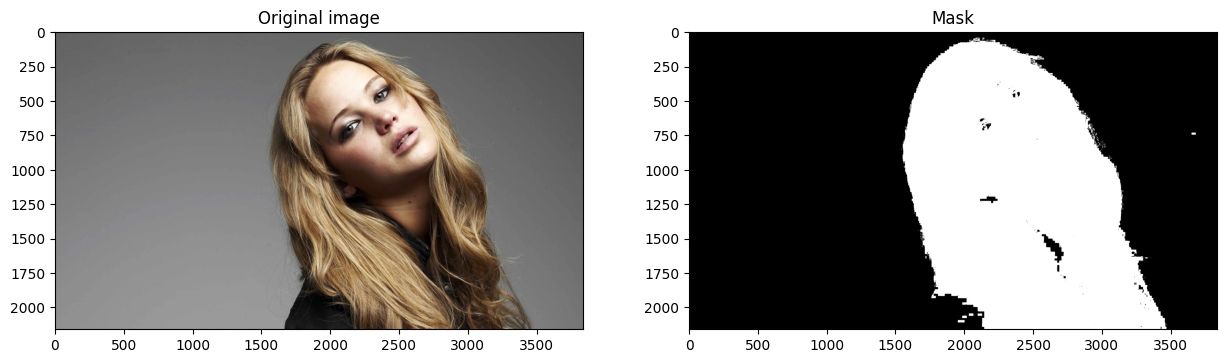

In [8]:
#Obtaining the foreground mask

foreground_mask = cv.threshold(saturation, 11, 255, cv.THRESH_BINARY)[1]
fig2 , (ax1, ax2) = plt.subplots(1,2)
fig2.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(cv.cvtColor(Original_image_jeniffer, cv.COLOR_BGR2RGB))
ax2.set_title('Mask')
ax2.imshow(foreground_mask, cmap='gray' )
plt.show()


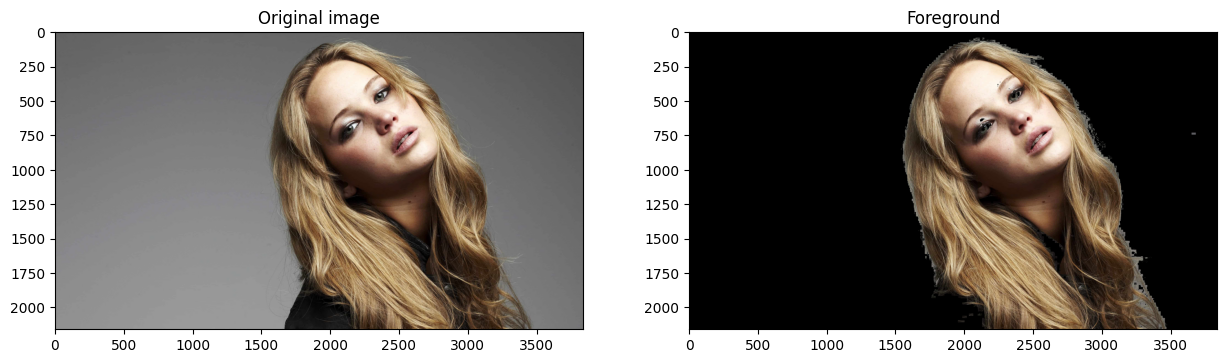

In [9]:
foreground = cv.bitwise_and(Original_image_jeniffer, Original_image_jeniffer, mask=foreground_mask)
fig3 , (ax1, ax2) = plt.subplots(1,2)  
fig3.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(cv.cvtColor(Original_image_jeniffer, cv.COLOR_BGR2RGB))
ax2.set_title('Foreground')
ax2.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.show()


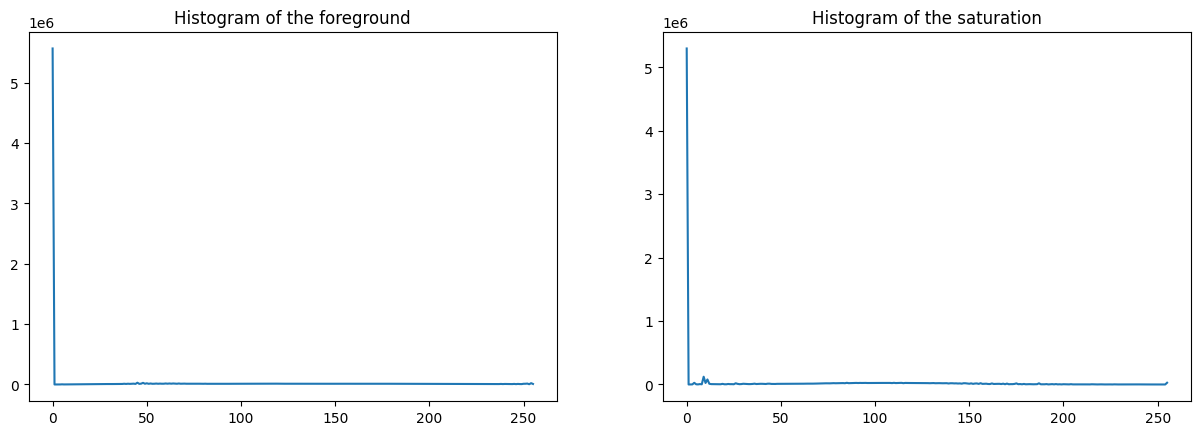

In [10]:
hist1 = cv.calcHist([foreground], [2], None , [256], [0, 256])
hist2 = cv.calcHist([saturation], [0], None, [256], [0, 256])

fig4 , (ax1, ax2) = plt.subplots(1,2)
fig4.set_figwidth(15)
ax1.set_title('Histogram of the foreground')
ax1.plot(hist1)
ax2.set_title('Histogram of the saturation')
ax2.plot(hist2)
plt.show()


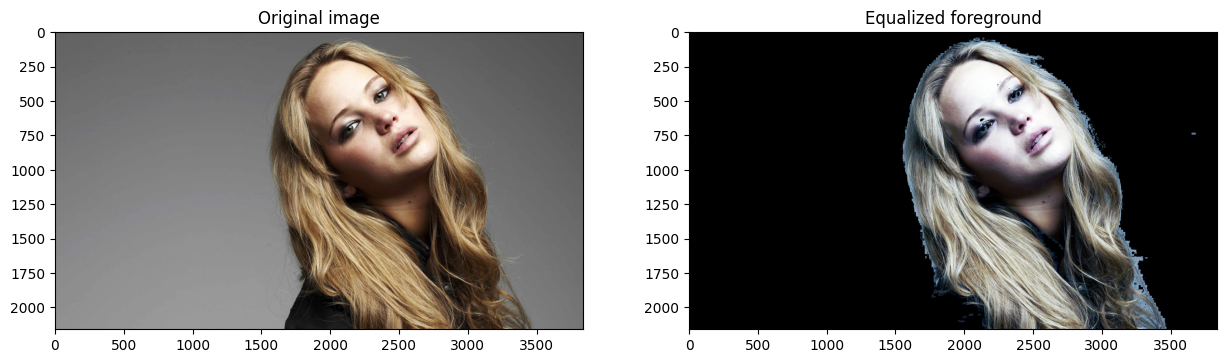

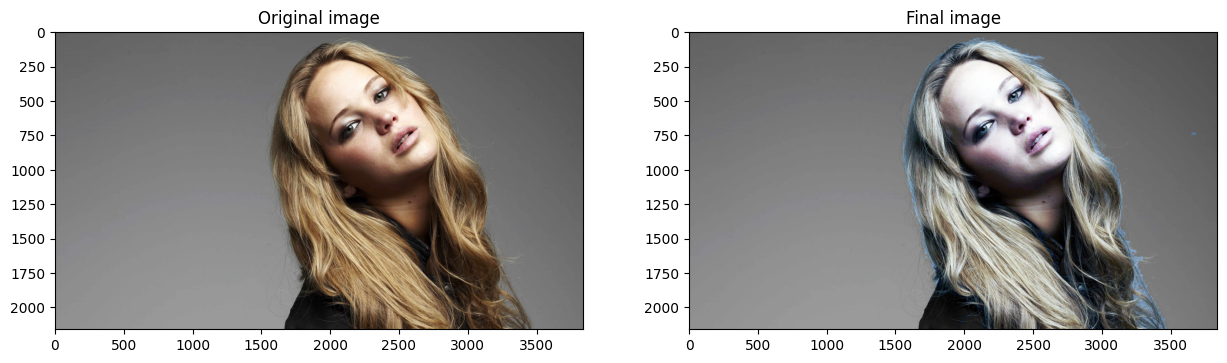

In [11]:
red , green , blue = cv.split(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))

red = cv.equalizeHist(red)
green = cv.equalizeHist(green)
blue = cv.equalizeHist(blue)

equalized_foreground = cv.merge([red, green, blue])

fig5 , (ax1, ax2) = plt.subplots(1,2)
fig5.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(cv.cvtColor(Original_image_jeniffer, cv.COLOR_BGR2RGB))
ax2.set_title('Equalized foreground')
ax2.imshow(equalized_foreground )
background  = cv.bitwise_and(Original_image_jeniffer, Original_image_jeniffer, mask=cv.bitwise_not(foreground_mask))

final_image = cv.add(cv.cvtColor(background, cv.COLOR_BGR2RGB), equalized_foreground)
fig6 , (ax1, ax2) = plt.subplots(1,2)
fig6.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(cv.cvtColor(Original_image_jeniffer, cv.COLOR_BGR2RGB))
ax2.set_title('Final image')
ax2.imshow(final_image)
plt.show()  

Question 7


import numpy as np


0 255


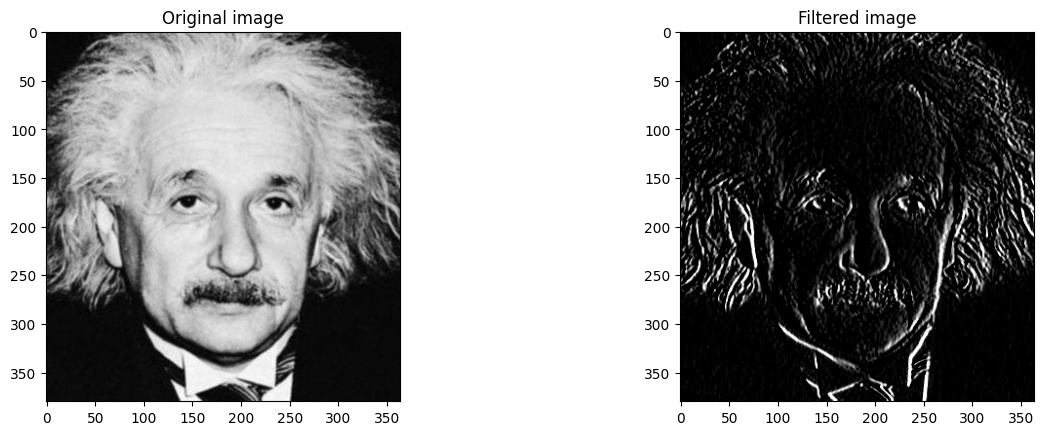

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Original_image_einstein = cv.imread('../einstein.png', cv.IMREAD_GRAYSCALE)

Sobel_filter = np.array([(1, 0 ,-1),(2 , 0 , -2),(1 ,0 ,-1)],dtype='float')

Filtered_Image1 = cv.filter2D(Original_image_einstein, -1, Sobel_filter)
print(Filtered_Image1.min() , Filtered_Image1.max())    


fig1 , (ax1, ax2) = plt.subplots(1,2)
fig1.set_figwidth(15)
ax1.set_title('Original image')
ax1.imshow(Original_image_einstein, cmap='gray')
ax2.set_title('Filtered image')
ax2.imshow(Filtered_Image1, cmap='gray')
plt.show()



# Question 8

Method 1: Pixel replication:
Introduction:
It is also known as Nearest neighbor interpolation. As its name suggest, in this method, we just replicate the neighboring pixels. As we have already discussed in the tutorial of Sampling, that zooming is nothing but increase amount of sample or pixels. This algorithm works on the same principle.

Working:
In this method we create new pixels form the already given pixels. Each pixel is replicated in this method n times row wise and column wise and you got a zoomed image. Its as simple as that.

For example:
if you have an image of 2 rows and 2 columns and you want to zoom it twice or 2 times using pixel replication, here how it can be done.

For a better understanding, the image has been taken in the form of matrix with the pixel values of the image.

[[1	2]  
[3	4]]

The above image has two rows and two columns, we will first zoom it row wise.

Row wise zooming:
When we zoom it row wise, we will just simple copy the rows pixels to its adjacent new cell.

Here how it would be done.

[[1	 1	2	2]
[3	3	4	4]]

As you can that in the above matrix, each pixel is replicated twice in the rows.

Column size zooming:
The next step is to replicate each of the pixel column wise, that we will simply copy the column pixel to its adjacent new column or simply below it.

Here how it would be done.

[[1	1	2	2]
[1	1	2	2]
[3	3	4	4]
[3	3	4	4]]
New image size:
As it can be seen from the above example, that an original image of 2 rows and 2 columns has been converted into 4 rows and 4 columns after zooming. That means the new image has a dimensions of

(Original image rows * zooming factor, Original Image cols * zooming factor)

Advantage and disadvantage:
One of the advantage of this zooming technique is, it is very simple. You just have to copy the pixels and nothing else.

The disadvantage of this technique is that image got zoomed but the output is very blurry. And as the zooming factor increased, the image got more and more blurred. That would eventually result in fully blurred image.

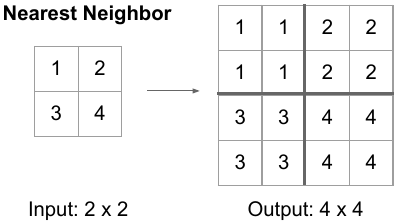

In [14]:
def nearest_neighbor_zoom(Original_image , factor):
    Height   = Original_image.shape[0]
    Width = Original_image.shape[1]
    New_Height = int(Height*factor)
    New_Width = int(Width*factor)
    New_Image = np.zeros((New_Height,New_Width,3)).astype(np.uint8)
    for i in range(New_Height):
        for j in range(New_Width):
            New_Image[i,j] = Original_image[int(i//factor), int(j//factor)]
    return New_Image

import cv2 as cv    
import numpy as np
import matplotlib.pyplot as plt

original_image_zoom1 = cv.cvtColor(cv.imread('../zooming/im01small.png',cv.IMREAD_COLOR ), cv.COLOR_BGR2RGB)
zoomed_image1 = nearest_neighbor_zoom(original_image_zoom1 , 4)


cv.namedWindow('Original image', cv.WINDOW_AUTOSIZE)
cv.imshow('Original image', cv.cvtColor(original_image_zoom1 , cv.COLOR_RGB2BGR))
cv.namedWindow('Zoomed image', cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed image', cv.cvtColor(zoomed_image1 , cv.COLOR_RGB2BGR))    
cv.waitKey(0)
cv.destroyAllWindows()


In [15]:
def bilinear_interpolation_zoom(Original_image, factor):
    Height   = Original_image.shape[0]
    Width = Original_image.shape[1]
    New_Height = int(Height*factor)
    New_Width = int(Width*factor)
    New_Image = np.zeros((New_Height,New_Width,3)).astype(np.uint8)
    
    for i in range(New_Height):
        for j in range(New_Width):
            src_i = i / factor
            src_j = j / factor
            x1 = int(src_i)
            x2 = min(x1 + 1, Height - 1)
            y1 = int(src_j)
            y2 = min(y1 + 1, Width - 1)
            
            dx = src_i - x1
            dy = src_j - y1
            
            interpolated_pixel = (1 - dx) * (1 - dy) * Original_image[x1, y1] + dx * (1 - dy) * Original_image[x2, y1] + (1 - dx) * dy * Original_image[x1, y2] + dx * dy * Original_image[x2, y2]
            
            New_Image[i, j] = interpolated_pixel
    
    return New_Image

In [16]:
import cv2 as cv    
import numpy as np
import matplotlib.pyplot as plt

original_image_zoom1 = cv.cvtColor(cv.imread('../zooming/im01small.png',cv.IMREAD_COLOR ), cv.COLOR_BGR2RGB)
zoomed_image2 = bilinear_interpolation_zoom(original_image_zoom1 , 4)

cv.namedWindow('Original image', cv.WINDOW_AUTOSIZE)
cv.imshow('Original image', cv.cvtColor(original_image_zoom1 , cv.COLOR_RGB2BGR))
cv.namedWindow('Zoomed image', cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed image', cv.cvtColor(zoomed_image1 , cv.COLOR_RGB2BGR))    
cv.waitKey(0)
cv.destroyAllWindows()




In [17]:
def normalized_ssd(image1, image2):
    diff = image1 - image2
    ssd = np.sum(diff ** 2)
    normalized_ssd = ssd / (image1.shape[0] * image1.shape[1] * image1.shape[2])
    return normalized_ssd

for i in range(1 , 3):
    small_image = cv.imread('../zooming/im0' + str(i) + 'small.png', cv.IMREAD_COLOR)
    zoomed_image = nearest_neighbor_zoom(small_image , 4)
    original_image = cv.imread('../zooming/im0' + str(i) + '.png', cv.IMREAD_COLOR)
    print('Normalized SSD for image ' + str(i) + ' is ' + str(normalized_ssd(zoomed_image, original_image)))

for i in range(4 , 8):
    small_image = cv.imread('../zooming/im0' + str(i) + 'small.png', cv.IMREAD_COLOR)
    zoomed_image = nearest_neighbor_zoom(small_image , 4)
    original_image = cv.imread('../zooming/im0' + str(i) + '.png', cv.IMREAD_COLOR)
    print('Normalized SSD for image ' + str(i) + ' is ' + str(normalized_ssd(zoomed_image, original_image)))

for i in range(9 , 10):
    small_image = cv.imread('../zooming/im0' + str(i) + 'small.png', cv.IMREAD_COLOR)
    zoomed_image = nearest_neighbor_zoom(small_image , 4)
    original_image = cv.imread('../zooming/im0' + str(i) + '.png', cv.IMREAD_COLOR)
    print('Normalized SSD for image ' + str(i) + ' is ' + str(normalized_ssd(zoomed_image, original_image)))


    
    

Normalized SSD for image 1 is 31.284316486625514
Normalized SSD for image 2 is 11.902013310185184
Normalized SSD for image 4 is 78.73781724215534
Normalized SSD for image 5 is 50.57724609375
Normalized SSD for image 6 is 30.553995949074075
Normalized SSD for image 7 is 27.964142659505207
Normalized SSD for image 9 is 21.148100694444445


In [18]:
for i in range(1 , 3):
    small_image = cv.imread('../zooming/im0' + str(i) + 'small.png', cv.IMREAD_COLOR)
    zoomed_image = bilinear_interpolation_zoom(small_image , 4)
    original_image = cv.imread('../zooming/im0' + str(i) + '.png', cv.IMREAD_COLOR)
    print('Normalized SSD for image ' + str(i) + ' is ' + str(normalized_ssd(zoomed_image, original_image)))

for i in range(4 , 8):
    small_image = cv.imread('../zooming/im0' + str(i) + 'small.png', cv.IMREAD_COLOR)
    zoomed_image = bilinear_interpolation_zoom(small_image , 4)
    original_image = cv.imread('../zooming/im0' + str(i) + '.png', cv.IMREAD_COLOR)
    print('Normalized SSD for image ' + str(i) + ' is ' + str(normalized_ssd(zoomed_image, original_image)))

for i in range(9 , 10):
    small_image = cv.imread('../zooming/im0' + str(i) + 'small.png', cv.IMREAD_COLOR)
    zoomed_image = bilinear_interpolation_zoom(small_image , 4)
    original_image = cv.imread('../zooming/im0' + str(i) + '.png', cv.IMREAD_COLOR)
    print('Normalized SSD for image ' + str(i) + ' is ' + str(normalized_ssd(zoomed_image, original_image)))


Normalized SSD for image 1 is 39.257033179012346
Normalized SSD for image 2 is 16.21177662037037
Normalized SSD for image 4 is 81.65874063625257
Normalized SSD for image 5 is 53.70764858217593
Normalized SSD for image 6 is 35.51769129372428
Normalized SSD for image 7 is 30.22005997721354
Normalized SSD for image 9 is 26.669085590277778


# Question 9

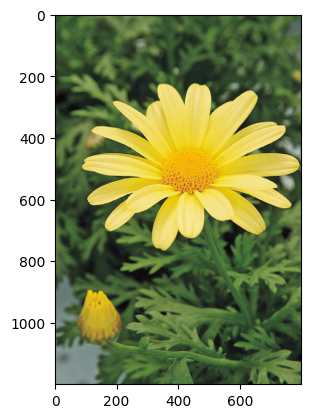

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('../flower.jpeg', cv.IMREAD_COLOR)   
plt.imshow(cv.cvtColor(image , cv.COLOR_BGR2RGB))




In [20]:

rect = (70, 178, 730, 619)

mask = np.zeros(image.shape[:2], dtype = "uint8")
fgdModel = np.zeros((1, 65), dtype = "float")
bgdModel = np.zeros((1, 65), dtype = "float")

(mask , bgdModel , fgdModel) =  cv.grabCut(image, mask, rect, bgdModel, fgdModel, 5 , cv.GC_INIT_WITH_RECT)


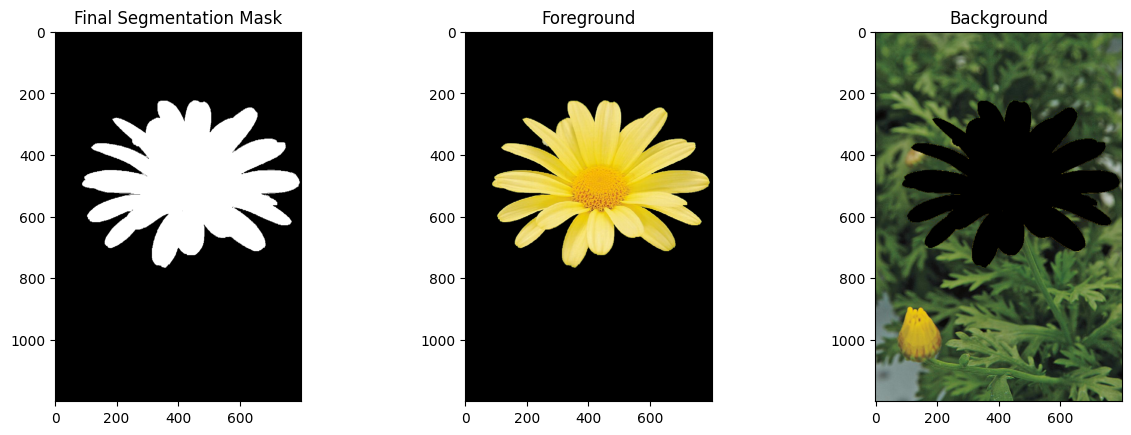

In [21]:
new_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

cv.grabCut(image, new_mask, None, bgdModel, fgdModel, 5 , cv.GC_INIT_WITH_MASK)

foreground = cv.bitwise_and(image, image, mask = new_mask)
background = image - foreground

fig1 , (ax1,ax2,ax3) = plt.subplots(1,3)
fig1.set_figwidth(15)
ax1.set_title('Final Segmentation Mask')
ax1.imshow(new_mask, cmap='gray')
ax2.set_title('Foreground')
ax2.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax3.set_title('Background')
ax3.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
plt.show()


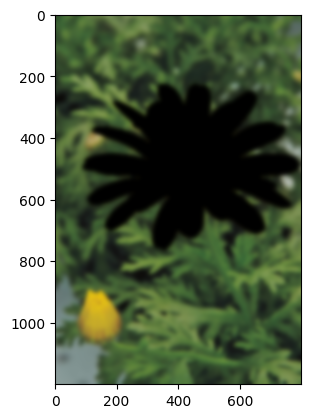

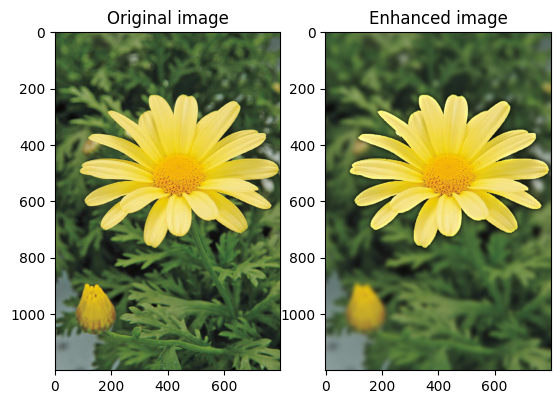

In [22]:

blurred_background = cv.GaussianBlur(background, (0, 0), 7)
plt.imshow(cv.cvtColor(blurred_background, cv.COLOR_BGR2RGB))
enhanced_image = cv.add(blurred_background, foreground)

# Display the original and enhanced images
fig2 , (ax1,ax2) = plt.subplots(1,2)
#fig2.set_figwidth(8)
ax1.set_title('Original image')
ax1.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax2.set_title('Enhanced image')
ax2.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.show()


In [23]:
print(new_mask.shape)
print(new_mask[:, :, np.newaxis].shape)
print(new_mask)
print(new_mask[:, :, np.newaxis])


(1200, 800)
(1200, 800, 1)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]
